In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from zipfile import ZipFile

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
df = pd.read_csv("./Data/avpat.csv", sep = "^", index_col = 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE
0,10000001,F,810000001,White British,A,2017-01-17
1,10000002,F,810000002,NaN,A,2017-01-14
2,10000003,M,810000003,White British,A,2017-01-17
3,10000004,M,810000004,White British,A,2017-01-13
4,10000005,F,810000005,NaN,A,2017-01-16


In [4]:
df.shape

(982482, 6)

In [5]:
zf = ZipFile('../../Data/sim_av_tumour.zip')
csv = zf.open('sim_av_tumour.csv')
avtum = pd.read_csv(csv)
avtum.head()

/home/elsa/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,6,8,9,17,18,20,22,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,SEX,CREG_CODE,LINKNUMBER,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,2,L0801,810000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,2,L0301,810000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,1,L0401,810000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,1,L1001,810000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,2,L0401,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [6]:
avtum.shape

(1402817, 34)

In [7]:
print("The original dataset has data for %d patients" % len(avtum))
print("After removing duplicates, the dataset has data for %d patients" % len(avtum.drop_duplicates()))

The original dataset has data for 1402817 patients
After removing duplicates, the dataset has data for 1402817 patients


In [8]:
df = df.merge(avtum, left_on = 'PATIENTID', right_on = 'PATIENTID', how = 'left')
df.head()

,PATIENTID,SEX_x,LINKNUMBER_x,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,SEX_y,CREG_CODE,LINKNUMBER_y,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,2,L0801,810000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,2,L0301,810000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,M,810000003,White British,A,2017-01-17,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,1,L0401,810000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,M,810000004,White British,A,2017-01-13,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,1,L1001,810000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,2,L0401,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [9]:
df.shape

(1039893, 39)

In [10]:
df = df.drop(['SEX_y',"LINKNUMBER_y"], axis = 1)
df.head()

,PATIENTID,SEX_x,LINKNUMBER_x,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,CREG_CODE,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,L0301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,M,810000003,White British,A,2017-01-17,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,M,810000004,White British,A,2017-01-13,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [11]:
df.rename(columns={'SEX_x': 'SEX', 'LINKNUMBER_x': 'LINKNUMBER'}, inplace=True)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,CREG_CODE,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,L0301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,M,810000003,White British,A,2017-01-17,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,M,810000004,White British,A,2017-01-13,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [12]:
df.shape

(1039893, 37)

In [13]:
df.dtypes

PATIENTID                     int64
SEX                          object
LINKNUMBER                    int64
ETHNICITY                    object
NEWVITALSTATUS               object
VITALSTATUSDATE              object
TUMOURID                      int64
DIAGNOSISDATEBEST            object
SITE_ICD10_O2                object
SITE_ICD10_O2_3CHAR          object
MORPH_ICD10_O2               object
BEHAVIOUR_ICD10_O2           object
T_BEST                       object
N_BEST                       object
M_BEST                       object
STAGE_BEST                   object
STAGE_BEST_SYSTEM           float64
GRADE                        object
AGE                           int64
CREG_CODE                    object
SCREENINGSTATUSFULL_CODE     object
ER_STATUS                    object
ER_SCORE                    float64
PR_STATUS                    object
PR_SCORE                    float64
HER2_STATUS                  object
CANCERCAREPLANINTENT         object
PERFORMANCESTATUS           

In [14]:
df.isna().sum()

PATIENTID                         0
SEX                               0
LINKNUMBER                        0
ETHNICITY                    152279
NEWVITALSTATUS                    0
VITALSTATUSDATE                   0
TUMOURID                          0
DIAGNOSISDATEBEST                 0
SITE_ICD10_O2                   355
SITE_ICD10_O2_3CHAR             326
MORPH_ICD10_O2                  344
BEHAVIOUR_ICD10_O2              271
T_BEST                       577404
N_BEST                       665001
M_BEST                       683043
STAGE_BEST                        7
STAGE_BEST_SYSTEM            571423
GRADE                         46548
AGE                               0
CREG_CODE                         0
SCREENINGSTATUSFULL_CODE     942352
ER_STATUS                    938849
ER_SCORE                     992769
PR_STATUS                    975294
PR_SCORE                    1013416
HER2_STATUS                  952320
CANCERCAREPLANINTENT         751923
PERFORMANCESTATUS           

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039893 entries, 0 to 1039892
Data columns (total 37 columns):
PATIENTID                   1039893 non-null int64
SEX                         1039893 non-null object
LINKNUMBER                  1039893 non-null int64
ETHNICITY                   887614 non-null object
NEWVITALSTATUS              1039893 non-null object
VITALSTATUSDATE             1039893 non-null object
TUMOURID                    1039893 non-null int64
DIAGNOSISDATEBEST           1039893 non-null object
SITE_ICD10_O2               1039538 non-null object
SITE_ICD10_O2_3CHAR         1039567 non-null object
MORPH_ICD10_O2              1039549 non-null object
BEHAVIOUR_ICD10_O2          1039622 non-null object
T_BEST                      462489 non-null object
N_BEST                      374892 non-null object
M_BEST                      356850 non-null object
STAGE_BEST                  1039886 non-null object
STAGE_BEST_SYSTEM           468470 non-null float64
GRADE     

In [16]:
df.count()

PATIENTID                   1039893
SEX                         1039893
LINKNUMBER                  1039893
ETHNICITY                    887614
NEWVITALSTATUS              1039893
VITALSTATUSDATE             1039893
TUMOURID                    1039893
DIAGNOSISDATEBEST           1039893
SITE_ICD10_O2               1039538
SITE_ICD10_O2_3CHAR         1039567
MORPH_ICD10_O2              1039549
BEHAVIOUR_ICD10_O2          1039622
T_BEST                       462489
N_BEST                       374892
M_BEST                       356850
STAGE_BEST                  1039886
STAGE_BEST_SYSTEM            468470
GRADE                        993345
AGE                         1039893
CREG_CODE                   1039893
SCREENINGSTATUSFULL_CODE      97541
ER_STATUS                    101044
ER_SCORE                      47124
PR_STATUS                     64599
PR_SCORE                      26477
HER2_STATUS                   87573
CANCERCAREPLANINTENT         287970
PERFORMANCESTATUS           

In [17]:
df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS',
       'VITALSTATUSDATE', 'TUMOURID', 'DIAGNOSISDATEBEST', 'SITE_ICD10_O2',
       'SITE_ICD10_O2_3CHAR', 'MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2', 'T_BEST',
       'N_BEST', 'M_BEST', 'STAGE_BEST', 'STAGE_BEST_SYSTEM', 'GRADE', 'AGE',
       'CREG_CODE', 'SCREENINGSTATUSFULL_CODE', 'ER_STATUS', 'ER_SCORE',
       'PR_STATUS', 'PR_SCORE', 'HER2_STATUS', 'CANCERCAREPLANINTENT',
       'PERFORMANCESTATUS', 'CNS', 'ACE27', 'GLEASON_PRIMARY',
       'GLEASON_SECONDARY', 'GLEASON_TERTIARY', 'GLEASON_COMBINED',
       'DATE_FIRST_SURGERY', 'LATERALITY', 'QUINTILE_2015'],
      dtype='object')

In [18]:
columns_selected = ['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS', 'VITALSTATUSDATE', 'TUMOURID',
        'DIAGNOSISDATEBEST','SITE_ICD10_O2','SITE_ICD10_O2_3CHAR', 'BEHAVIOUR_ICD10_O2', 'STAGE_BEST', 'GRADE', 'AGE', 
        'CREG_CODE', 'ER_STATUS', 'PR_STATUS', 'HER2_STATUS', 'CANCERCAREPLANINTENT',
        'PERFORMANCESTATUS', 'ACE27', 'DATE_FIRST_SURGERY', 'LATERALITY', 'QUINTILE_2015']
df = df[columns_selected]
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,F,810000001,White British,A,2017-01-17,10000001,2015-11-06,C443,C44,3,?,GX,90,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,F,810000002,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,3,?,GX,84,L0301,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,M,810000003,White British,A,2017-01-17,10000003,2013-01-30,C449,C44,3,?,GX,68,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,M,810000004,White British,A,2017-01-13,10000004,2015-09-15,C449,C44,3,?,GX,69,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,F,810000005,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,3,U,GX,58,L0401,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [19]:
df = df[df['SITE_ICD10_O2_3CHAR'] == 'C50']
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,C64,C50,3,2B,G2,71,L1201,NaN,NaN,NaN,C,NaN,NaN,NaN,R,3
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,3,?,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C343,C50,3,4C,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,C447,C50,3,?,G1,71,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C447,C50,3,3A,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4


In [20]:
df.shape

(108230, 24)

In [21]:
df['PATIENTID'].value_counts().sort_values(ascending = False).head(10)

20036021    3
20071892    3
20016664    3
20003454    3
20012119    3
20097535    3
20058104    3
20056460    3
20012399    3
20023580    3
Name: PATIENTID, dtype: int64

In [22]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') == 3].sort_values(by='PATIENTID').head(10)

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
302560,20003454,F,820003454,White British,A,2017-01-14,20003454,2014-07-01,C508,C50,3,1A,G3,66,L1201,P,P,N,NaN,NaN,NaN,2014-08-16,R,4
302561,20003454,F,820003454,White British,A,2017-01-14,20128733,2014-09-15,C509,C50,1,0,G1,66,L1201,P,P,NaN,NaN,NaN,NaN,2014-09-15,L,4
302562,20003454,F,820003454,White British,A,2017-01-14,20136397,2014-09-15,C509,C50,3,2A,G1,66,L1201,P,NaN,N,NaN,NaN,NaN,2014-09-15,R,4
308605,20010794,F,820010794,Other white background,A,2017-01-17,20010794,2014-04-29,C501,C50,3,1A,G2,62,L0901,P,P,Pm,C,NaN,NaN,2014-06-11,L,1 - least deprived
308606,20010794,F,820010794,Other white background,A,2017-01-17,20129134,2014-06-08,C505,C50,3,1A,G2,62,L0901,P,NaN,B,NaN,9,NaN,2014-07-20,R,1 - least deprived
308607,20010794,F,820010794,Other white background,A,2017-01-17,20136414,2014-06-13,C509,C50,3,?,G2,62,L0901,P,P,NaN,C,1,1,NaN,L,1 - least deprived
309697,20012119,F,820012119,Other white background,A,2017-01-16,20012119,2015-01-29,C508,C50,3,4,G2,76,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,L,5 - most deprived
309698,20012119,F,820012119,Other white background,A,2017-01-16,20129217,2015-12-31,C64,C50,3,?,G2,76,L0801,P,NaN,N,NaN,NaN,NaN,2016-03-10,L,5 - most deprived
309699,20012119,F,820012119,Other white background,A,2017-01-16,20136418,2015-12-31,C509,C50,3,2,G1,76,L0801,P,P,N,NaN,NaN,NaN,2016-03-15,L,5 - most deprived
309940,20012399,F,820012399,White British,A,2017-01-16,20136420,2014-04-15,C509,C50,3,1A,G2,64,L0201,P,P,N,9,2m,NaN,2014-05-26,R,4


In [23]:
df['NUMBER_TUMOURS'] = df.groupby('PATIENTID')['PATIENTID'].transform('size')
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,C64,C50,3,2B,G2,71,L1201,NaN,NaN,NaN,C,NaN,NaN,NaN,R,3,1
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,3,?,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,C343,C50,3,4C,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,C447,C50,3,?,G1,71,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,C447,C50,3,3A,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1


In [24]:
df[df['PATIENTID'] == 20010794]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS
308605,20010794,F,820010794,Other white background,A,2017-01-17,20010794,2014-04-29,C501,C50,3,1A,G2,62,L0901,P,P,Pm,C,NaN,NaN,2014-06-11,L,1 - least deprived,3
308606,20010794,F,820010794,Other white background,A,2017-01-17,20129134,2014-06-08,C505,C50,3,1A,G2,62,L0901,P,NaN,B,NaN,9,NaN,2014-07-20,R,1 - least deprived,3
308607,20010794,F,820010794,Other white background,A,2017-01-17,20136414,2014-06-13,C509,C50,3,?,G2,62,L0901,P,P,NaN,C,1,1,NaN,L,1 - least deprived,3


In [25]:
df['NUMBER_TUMOURS'].value_counts()

1    103192
2      4888
3       150
Name: NUMBER_TUMOURS, dtype: int64

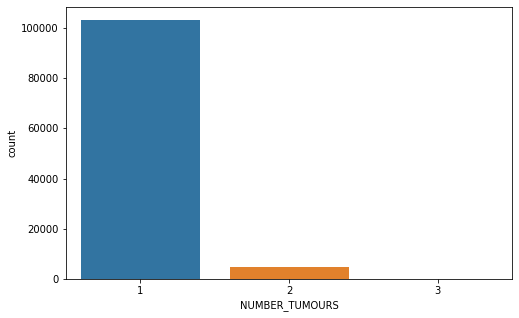

In [26]:
ax = sns.countplot(data = df, x = 'NUMBER_TUMOURS')
plt.gcf().set_size_inches(8,5)

In [27]:
df['ETHNICITY'].value_counts()

White British                    89218
Other white background            3764
Asian Indian                      1483
Other ethnic group                1310
Black Caribbean                   1015
White Irish                        807
Asian Pakistani                    755
Black African                      718
Other Asian background             715
Other black background             368
Chinese                            306
Other mixed background             216
Asian Bangladeshi                  161
White and black Caribbean          117
Mixed white and Asian              111
Mixed white and black African       78
White                               13
Other                                2
Name: ETHNICITY, dtype: int64

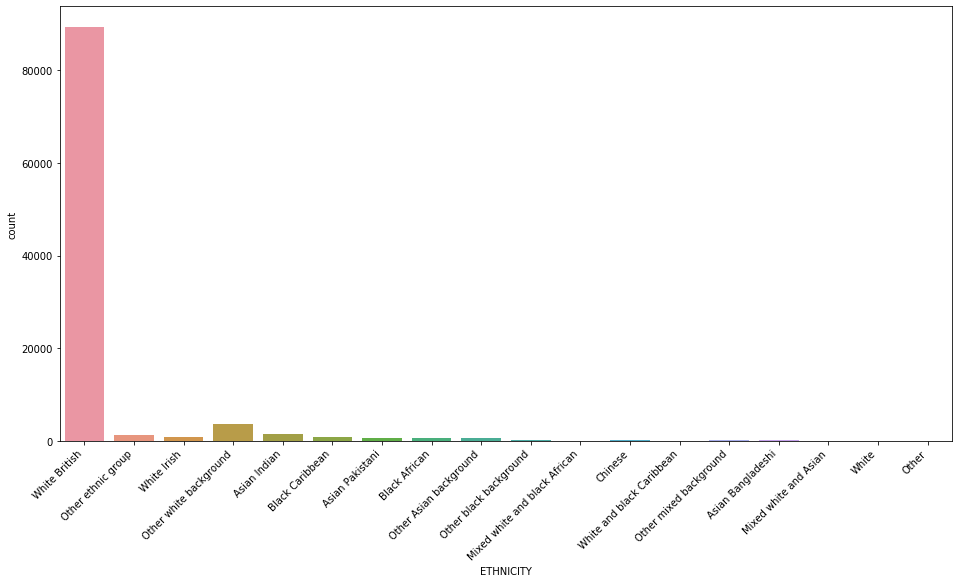

In [28]:
ax = sns.countplot(data = df, x = 'ETHNICITY')
plt.gcf().set_size_inches(16,8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

In [30]:
df['NEWVITALSTATUS'].value_counts()

A    106863
D      1367
Name: NEWVITALSTATUS, dtype: int64

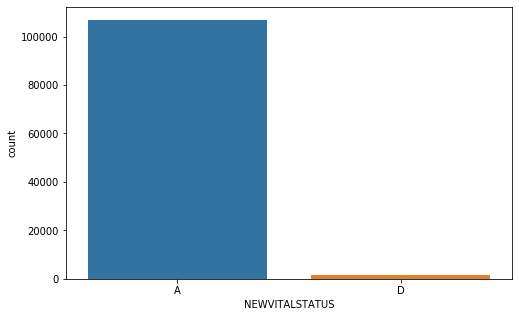

In [31]:
ax = sns.countplot(data = df, x = 'NEWVITALSTATUS')
plt.gcf().set_size_inches(8,5)

In [ ]:
df['SC500'] = df.groupby('PATIENTID')['NEWVITALSTATUS'].transform(lambda patient: True if any('C500' in tumour for tumour in patient) else False)

In [31]:
df['SITE_ICD10_O2'].value_counts()

C509    41705
C504    30840
C502     9739
C508     5891
C505     5750
C501     5594
C503     5025
C500     1125
C506      554
C341      328
C64       197
C443      173
C343      173
D051      155
D050      135
C447       93
C349       78
C446       74
C56        64
C342       41
C442       34
C539       32
C441       27
C437       22
C61        21
C65        19
C66        17
C436       17
D033       14
C099       13
C340       10
C060       10
C570        9
D037        8
C711        7
C530        6
D073        6
C73         5
D036        5
D091        5
C449        5
C541        5
C433        5
C450        5
C510        5
D486        4
C492        4
C20         4
C519        4
C07         4
C679        4
C833        4
C211        3
C445        3
D032        3
C348        3
C857        3
C621        3
D332        3
D391        3
C710        3
C690        3
D411        3
D057        2
C692        2
C490        2
C221        2
C719        2
C187        2
C859        2
C210        2
C712  

In [32]:
df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].astype(str)
def site_icd(value):
    if value == 'C509' or value == 'nan':
        return np.nan
    elif value.startswith('C50'):
        return value
    else:
        return np.nan

df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].apply(site_icd)
df['SITE_ICD10_O2'].value_counts()

C504    30840
C502     9739
C508     5891
C505     5750
C501     5594
C503     5025
C500     1125
C506      554
Name: SITE_ICD10_O2, dtype: int64

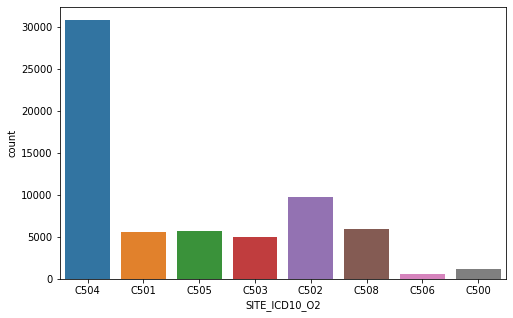

In [33]:
ax = sns.countplot(data = df, x = 'SITE_ICD10_O2')
plt.gcf().set_size_inches(8,5)

In [34]:
df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].astype(str)
df['SC500'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C500' in tumour for tumour in patient) else False)
df['SC501'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C501' in tumour for tumour in patient) else False)
df['SC502'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C502' in tumour for tumour in patient) else False)
df['SC503'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C503' in tumour for tumour in patient) else False)
df['SC504'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C504' in tumour for tumour in patient) else False)
df['SC505'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C505' in tumour for tumour in patient) else False)
df['SC506'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C506' in tumour for tumour in patient) else False)
df['SC508'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: True if any('C508' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,3,2B,G2,71,L1201,NaN,NaN,NaN,C,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,3,?,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,3,4C,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,3,?,G1,71,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,3,3A,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False


In [35]:
df[df['PATIENTID'] == 20010794]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508
308605,20010794,F,820010794,Other white background,A,2017-01-17,20010794,2014-04-29,C501,C50,3,1A,G2,62,L0901,P,P,Pm,C,NaN,NaN,2014-06-11,L,1 - least deprived,3,False,True,False,False,False,True,False,False
308606,20010794,F,820010794,Other white background,A,2017-01-17,20129134,2014-06-08,C505,C50,3,1A,G2,62,L0901,P,NaN,B,NaN,9,NaN,2014-07-20,R,1 - least deprived,3,False,True,False,False,False,True,False,False
308607,20010794,F,820010794,Other white background,A,2017-01-17,20136414,2014-06-13,nan,C50,3,?,G2,62,L0901,P,P,NaN,C,1,1,NaN,L,1 - least deprived,3,False,True,False,False,False,True,False,False


In [36]:
#df = df.drop(['SITE_ICD10_O2'], axis = 1)
#df.head()

In [37]:
df['BEHAVIOUR_ICD10_O2'].value_counts()

3      86155
3.0    20803
5        577
2        482
5.0       72
1         41
6         31
0         16
XXX       13
1.0        5
2          4
6.0        3
0.0        2
9          1
Name: BEHAVIOUR_ICD10_O2, dtype: int64

In [38]:
df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].astype(str)
def behaviour(value):
    if value.startswith('0'):
        return 'Benign'
    elif value.startswith('1'):
        return 'Uncertain'
    elif value.startswith('2'):
        return 'In situ'
    elif value.startswith('3'):
        return 'Malignant'
    elif value.startswith('5'):
        return 'Micro-invasive'
    elif value.startswith('X') or value.startswith('6') or value.startswith('9') or value == 'nan':
        return np.nan
    else:
        return value

df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].apply(behaviour)
df['BEHAVIOUR_ICD10_O2'].value_counts()

Malignant         106958
Micro-invasive       649
In situ              486
Uncertain             46
Benign                18
Name: BEHAVIOUR_ICD10_O2, dtype: int64

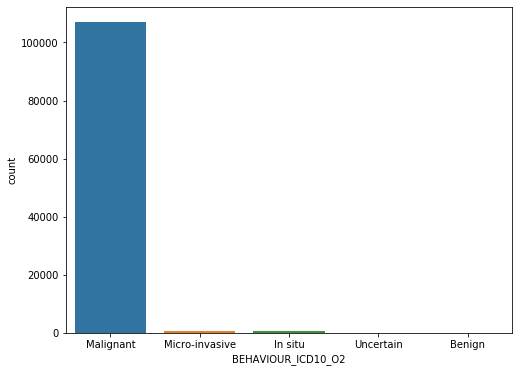

In [39]:
ax = sns.countplot(data = df, x = 'BEHAVIOUR_ICD10_O2')
plt.gcf().set_size_inches(8,6)

In [40]:
df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].astype(str)
df['BEH_BENIGN'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Benign' in tumour for tumour in patient) else False)
df['BEH_MALIG'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Malignant' in tumour for tumour in patient) else False)
df['BEH_MICINV'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Micro-invasive' in tumour for tumour in patient) else False)
df['BEH_INSITU'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('In situ' in tumour for tumour in patient) else False)
df['BEH_UNCERT'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: True if any('Uncertain' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,2B,G2,71,L1201,NaN,NaN,NaN,C,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,?,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,4C,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,?,G1,71,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,3A,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False


In [41]:
df[df['PATIENTID'] == 20005410]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT
304189,20005410,F,820005410,White British,A,2017-01-16,20005410,2013-12-04,nan,C50,Malignant,3A,G2,50,L1201,NaN,NaN,NaN,C,NaN,NaN,2014-02-08,R,2,2,False,False,False,False,False,False,False,False,True,True,False,False,False
304190,20005410,F,820005410,White British,A,2017-01-16,20128840,2014-05-08,nan,C50,Benign,U,GX,50,L1201,NaN,NaN,NaN,C,NaN,NaN,2014-05-10,L,2,2,False,False,False,False,False,False,False,False,True,True,False,False,False


In [42]:
# df = df.drop(['BEHAVIOUR_ICD10_O2'], axis = 1)
# df.head()

In [43]:
df['STAGE_BEST'].value_counts()

1A     41565
2A     26758
2B     12546
?      10079
3A      5378
4       3487
1B      1814
3C      1722
3B      1640
1       1014
0        953
U        526
2        383
3        202
4B        31
1C        27
4S        19
1A1       18
4A        14
2C        13
2A2       11
4C         9
0A         4
1A2        4
2A1        3
3S         3
1B1        2
1B2        1
2E         1
1S         1
1E         1
0IS        1
Name: STAGE_BEST, dtype: int64

In [44]:
df['STAGE_BEST'] = df['STAGE_BEST'].astype(str)
def stage_best(value):
    if value.startswith('0'):
        return 'Stage 0'
    elif value.startswith('1'):
        return 'Stage 1'
    elif value.startswith('2'):
        return 'Stage 2'
    elif value.startswith('3'):
        return 'Stage 3'
    elif value.startswith('4'):
        return 'Stage 4'
    elif value == '?' or value == 'U' or value == 'nan':
        return np.nan
    else:
        return value

df['STAGE_BEST'] = df['STAGE_BEST'].apply(stage_best)
df['STAGE_BEST'].value_counts()

Stage 1    44447
Stage 2    39715
Stage 3     8945
Stage 4     3560
Stage 0      958
Name: STAGE_BEST, dtype: int64

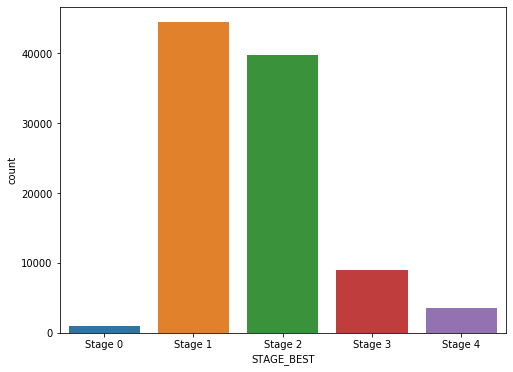

In [45]:
ax = sns.countplot(data = df, x = 'STAGE_BEST', order = ['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
plt.gcf().set_size_inches(8,6)

In [46]:
df['STAGE_BEST'] = df['STAGE_BEST'].astype(str)
df['STAGE0'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 0' in tumour for tumour in patient) else False)
df['STAGE1'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 1' in tumour for tumour in patient) else False)
df['STAGE2'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 2' in tumour for tumour in patient) else False)
df['STAGE3'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 3' in tumour for tumour in patient) else False)
df['STAGE4'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: True if any('Stage 4' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,NaN,NaN,NaN,C,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [47]:
df[df['PATIENTID'] == 20012119]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4
309697,20012119,F,820012119,Other white background,A,2017-01-16,20012119,2015-01-29,C508,C50,Malignant,Stage 4,G2,76,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True
309698,20012119,F,820012119,Other white background,A,2017-01-16,20129217,2015-12-31,nan,C50,Malignant,nan,G2,76,L0801,P,NaN,N,NaN,NaN,NaN,2016-03-10,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True
309699,20012119,F,820012119,Other white background,A,2017-01-16,20136418,2015-12-31,nan,C50,Malignant,Stage 2,G1,76,L0801,P,P,N,NaN,NaN,NaN,2016-03-15,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True


In [48]:
# df = df.drop(['STAGE_BEST'], axis = 1)
# df.head()

In [49]:
df['GRADE'].value_counts()

G2    53897
G3    31643
G1    15785
GX     6134
G4       60
Name: GRADE, dtype: int64

In [50]:
df['GRADE'] = df['GRADE'].astype(str)
def grade(value):
    if value == 'GX' or value == 'nan':
        return np.nan
    else:
        return value

df['GRADE'] = df['GRADE'].apply(grade)
df['GRADE'].value_counts()

G2    53897
G3    31643
G1    15785
G4       60
Name: GRADE, dtype: int64

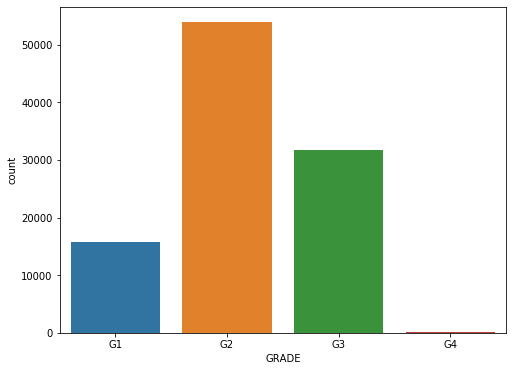

In [51]:
ax = sns.countplot(data = df, x = 'GRADE', order = ['G1', 'G2', 'G3', 'G4'])
plt.gcf().set_size_inches(8,6)

In [52]:
df['GRADE'] = df['GRADE'].astype(str)
df['GRADE1'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G1' in tumour for tumour in patient) else False)
df['GRADE2'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G2' in tumour for tumour in patient) else False)
df['GRADE3'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G3' in tumour for tumour in patient) else False)
df['GRADE4'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: True if any('G4' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,NaN,NaN,NaN,C,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False


In [53]:
df[df['PATIENTID'] == 20012119]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4
309697,20012119,F,820012119,Other white background,A,2017-01-16,20012119,2015-01-29,C508,C50,Malignant,Stage 4,G2,76,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True,True,True,False,False
309698,20012119,F,820012119,Other white background,A,2017-01-16,20129217,2015-12-31,nan,C50,Malignant,nan,G2,76,L0801,P,NaN,N,NaN,NaN,NaN,2016-03-10,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True,True,True,False,False
309699,20012119,F,820012119,Other white background,A,2017-01-16,20136418,2015-12-31,nan,C50,Malignant,Stage 2,G1,76,L0801,P,P,N,NaN,NaN,NaN,2016-03-15,L,5 - most deprived,3,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True,True,True,False,False


In [54]:
# df = df.drop(['GRADE'], axis = 1)
# df.head()

In [55]:
df['AGE'].describe()

count    108230.000000
mean         63.018294
std          14.316331
min           3.000000
25%          52.000000
50%          63.000000
75%          73.000000
max         105.000000
Name: AGE, dtype: float64

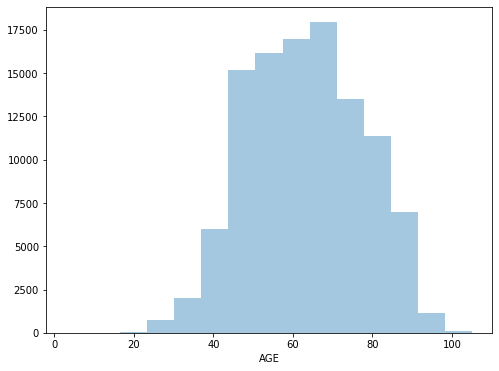

In [56]:
ax = sns.distplot(df['AGE'], hist = True, kde = False, bins = 15)
plt.gcf().set_size_inches(8,6)

In [57]:
df['AGE_MEAN'] = df.groupby('PATIENTID')['AGE'].transform(np.mean)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,NaN,NaN,NaN,C,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0


In [58]:
# df = df.drop(['AGE'], axis = 1)
# df.head()

In [59]:
df['CREG_CODE'].value_counts()

L0801    23055
L1001    16970
L1701    13661
L0201    13635
L0401    12551
L1201    11475
L0301    10611
L0901     6272
Name: CREG_CODE, dtype: int64

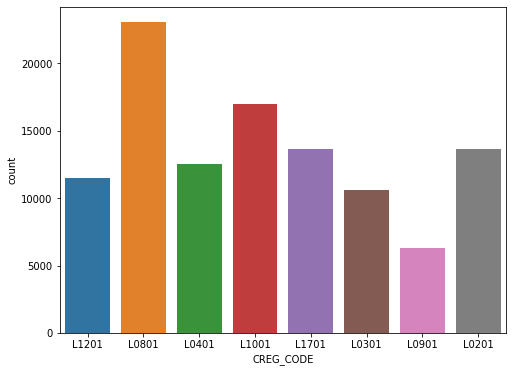

In [60]:
ax = sns.countplot(data = df, x = 'CREG_CODE')
plt.gcf().set_size_inches(8,6)

In [61]:
df['CREG_CODE'] = df['CREG_CODE'].astype(str)
df['L0801'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0801' in tumour for tumour in patient) else False)
df['L1001'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L1001' in tumour for tumour in patient) else False)
df['L1701'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L1701' in tumour for tumour in patient) else False)
df['L0201'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0201' in tumour for tumour in patient) else False)
df['L0401'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0401' in tumour for tumour in patient) else False)
df['L1201'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L1201' in tumour for tumour in patient) else False)
df['L0301'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0301' in tumour for tumour in patient) else False)
df['L0901'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: True if any('L0901' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,NaN,NaN,NaN,C,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,NaN,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,NaN,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False


In [62]:
# df = df.drop(['CREG_CODE'], axis = 1)
# df.head()

In [63]:
df['ER_STATUS'].value_counts()

P     69810
N     12101
U      9443
Pm      351
X       124
B        61
Name: ER_STATUS, dtype: int64

In [64]:
df['ER_STATUS'] = df['ER_STATUS'].astype(str)
def er_status(value):
    if value.startswith('P'):
        return 'Positive'
    elif value.startswith('N'):
        return 'Negative'    
    elif value == 'U' or value == 'X' or value == 'B' or value == 'nan':
        return np.nan        
    else:
        return value

df['ER_STATUS'] = df['ER_STATUS'].apply(er_status)
df['ER_STATUS'].value_counts()

Positive    70161
Negative    12101
Name: ER_STATUS, dtype: int64

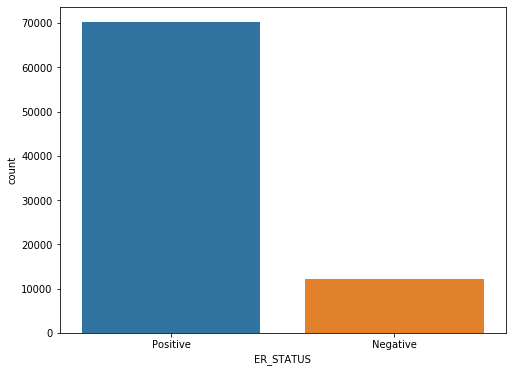

In [65]:
ax = sns.countplot(data = df, x = 'ER_STATUS')
plt.gcf().set_size_inches(8,6)

In [66]:
df['ER_STATUS'] = df['ER_STATUS'].astype(str)
df['ER_POS'] = df.groupby('PATIENTID')['ER_STATUS'].transform(lambda patient: True if any('Positive' in tumour for tumour in patient) else False)
df['ER_NEG'] = df.groupby('PATIENTID')['ER_STATUS'].transform(lambda patient: True if any('Negative' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,nan,NaN,NaN,C,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,nan,NaN,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,nan,NaN,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,nan,NaN,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,nan,NaN,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False


In [67]:
# df = df.drop(['ER_STATUS'], axis = 1)
# df.head()

In [68]:
# df['ER_SCORE'].value_counts()

In [69]:
# def er_score(value):
#     if value == 1:
#         return np.nan
#     else:
#         return value

# df['ER_SCORE'] = df['ER_SCORE'].apply(er_score)
# df['ER_SCORE'].value_counts()

In [70]:
# ax = sns.countplot(data = df, x = 'ER_SCORE')
# plt.gcf().set_size_inches(8,6)

In [71]:
# df['ER_SCORE'] = df['ER_SCORE'].astype(str)
# df['ERSCORE0'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('0.0' in tumour for tumour in patient) else False)
# df['ERSCORE2'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('2.0' in tumour for tumour in patient) else False)
# df['ERSCORE3'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('3.0' in tumour for tumour in patient) else False)
# df['ERSCORE4'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('4.0' in tumour for tumour in patient) else False)
# df['ERSCORE5'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('5.0' in tumour for tumour in patient) else False)
# df['ERSCORE6'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('6.0' in tumour for tumour in patient) else False)
# df['ERSCORE7'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('7.0' in tumour for tumour in patient) else False)
# df['ERSCORE8'] = df.groupby('PATIENTID')['ER_SCORE'].transform(lambda patient: True if any('8.0' in tumour for tumour in patient) else False)
# df.head()

In [72]:
# df = df.drop(['ER_SCORE'], axis = 1)
# df.head()

In [73]:
df['PR_STATUS'].value_counts()

P     34650
N     15986
U      6359
X      2245
Pm      329
B        87
Name: PR_STATUS, dtype: int64

In [74]:
df['PR_STATUS'] = df['PR_STATUS'].astype(str)
def pr_status(value):
    if value.startswith('P'):
        return 'Positive'
    elif value.startswith('N'):
        return 'Negative'    
    elif value == 'U' or value == 'X' or value == 'B' or value == 'nan':
        return np.nan        
    else:
        return value

df['PR_STATUS'] = df['PR_STATUS'].apply(pr_status)
df['PR_STATUS'].value_counts()

Positive    34979
Negative    15986
Name: PR_STATUS, dtype: int64

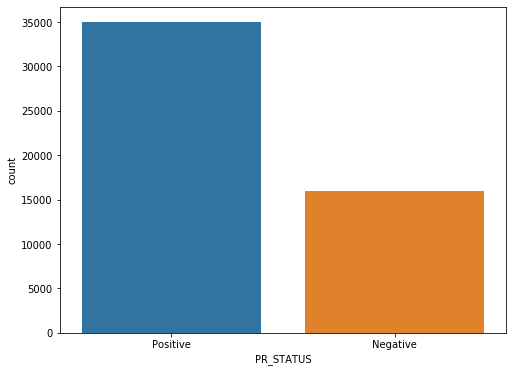

In [75]:
ax = sns.countplot(data = df, x = 'PR_STATUS')
plt.gcf().set_size_inches(8,6)

In [76]:
df['PR_STATUS'] = df['PR_STATUS'].astype(str)
df['PR_POS'] = df.groupby('PATIENTID')['PR_STATUS'].transform(lambda patient: True if any('Positive' in tumour for tumour in patient) else False)
df['PR_NEG'] = df.groupby('PATIENTID')['PR_STATUS'].transform(lambda patient: True if any('Negative' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,nan,nan,NaN,C,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,nan,nan,NaN,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,nan,nan,NaN,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,nan,nan,NaN,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,nan,nan,NaN,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False


In [77]:
# df = df.drop(['PR_STATUS'], axis = 1)
# df.head()

In [78]:
# df['PR_SCORE'].value_counts()

In [79]:
# def pr_score(value):
#     if value == 1:
#         return np.nan
#     else:
#         return value

# df['PR_SCORE'] = df['PR_SCORE'].apply(pr_score)
# df['PR_SCORE'].value_counts()

In [80]:
# ax = sns.countplot(data = df, x = 'PR_SCORE')
# plt.gcf().set_size_inches(8,6)

In [81]:
# df['PR_SCORE'] = df['PR_SCORE'].astype(str)
# df['PRSCORE0'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('0.0' in tumour for tumour in patient) else False)
# df['PRSCORE2'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('2.0' in tumour for tumour in patient) else False)
# df['PRSCORE3'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('3.0' in tumour for tumour in patient) else False)
# df['PRSCORE4'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('4.0' in tumour for tumour in patient) else False)
# df['PRSCORE5'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('5.0' in tumour for tumour in patient) else False)
# df['PRSCORE6'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('6.0' in tumour for tumour in patient) else False)
# df['PRSCORE7'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('7.0' in tumour for tumour in patient) else False)
# df['PRSCORE8'] = df.groupby('PATIENTID')['PR_SCORE'].transform(lambda patient: True if any('8.0' in tumour for tumour in patient) else False)
# df.head()

In [82]:
# df = df.drop(['PR_SCORE'], axis = 1)
# df.head()

In [83]:
df['HER2_STATUS'].value_counts()

N     68699
P     11371
B      3447
Pm      229
X       197
Name: HER2_STATUS, dtype: int64

In [84]:
df['HER2_STATUS'] = df['HER2_STATUS'].astype(str)
def her2_status(value):
    if value.startswith('P'):
        return 'Positive'
    elif value.startswith('N'):
        return 'Negative'    
    elif value == 'X' or value == 'B' or value == 'nan':
        return np.nan        
    else:
        return value

df['HER2_STATUS'] = df['HER2_STATUS'].apply(her2_status)
df['HER2_STATUS'].value_counts()

Negative    68699
Positive    11600
Name: HER2_STATUS, dtype: int64

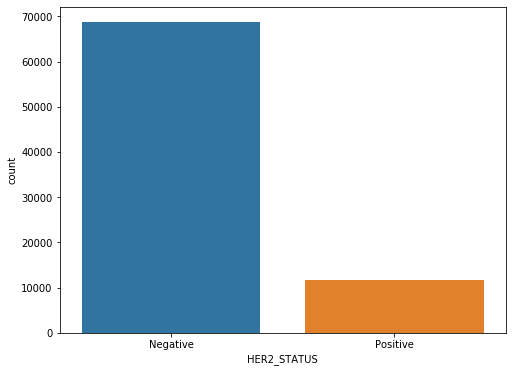

In [85]:
ax = sns.countplot(data = df, x = 'HER2_STATUS')
plt.gcf().set_size_inches(8,6)

In [86]:
df['HER2_STATUS'] = df['HER2_STATUS'].astype(str)
df['HER_POS'] = df.groupby('PATIENTID')['HER2_STATUS'].transform(lambda patient: True if any('Positive' in tumour for tumour in patient) else False)
df['HER_NEG'] = df.groupby('PATIENTID')['HER2_STATUS'].transform(lambda patient: True if any('Negative' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,nan,nan,nan,C,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,nan,nan,nan,NaN,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,nan,nan,nan,Z,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,nan,nan,nan,NaN,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,nan,nan,nan,C,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
# df = df.drop(['HER2_STATUS'], axis = 1)
# df.head()

In [88]:
df['CANCERCAREPLANINTENT'].value_counts()

C     46044
9      4863
Z      1812
X       207
Cm      186
Zm        4
Name: CANCERCAREPLANINTENT, dtype: int64

In [89]:
df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].astype(str)
def planintent(value):
    if value.startswith('C'):
        return 'Curative'
    elif value.startswith('Z'):
        return 'Non curative'
    elif value == 'X':
        return 'No active treatment'
    elif value == '9' or value == 'nan':
        return np.nan
    else:
        return value

df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].apply(planintent)
df['CANCERCAREPLANINTENT'].value_counts()

Curative               46230
Non curative            1816
No active treatment      207
Name: CANCERCAREPLANINTENT, dtype: int64

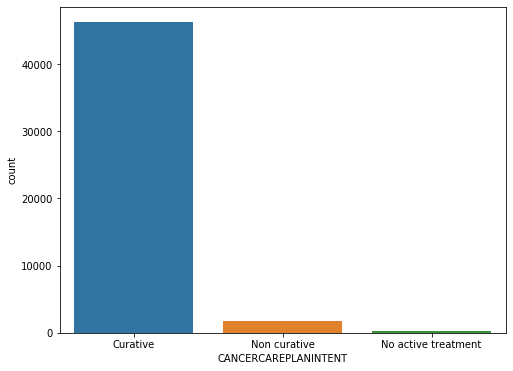

In [90]:
ax = sns.countplot(data = df, x = 'CANCERCAREPLANINTENT')
plt.gcf().set_size_inches(8,6)

In [91]:
df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].astype(str)
df['CURATIVE'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: True if any('Curative' in tumour for tumour in patient) else False)
df['NONCURATIVE'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: True if any('Non curative' in tumour for tumour in patient) else False)
df['NOACTTREAT'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: True if any('No active treatment' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,nan,nan,nan,Curative,NaN,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,nan,nan,nan,nan,NaN,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,nan,nan,nan,Non curative,NaN,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,nan,nan,nan,nan,NaN,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,nan,nan,nan,Curative,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [92]:
# df = df.drop(['CANCERCAREPLANINTENT'], axis = 1)
# df.head()

In [93]:
df['PERFORMANCESTATUS'].value_counts()

0     20919
9     11296
1      2928
2      1103
3       836
4       272
1m      126
2m       39
3m       14
4m        5
Name: PERFORMANCESTATUS, dtype: int64

In [94]:
df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].astype(str)
def perfstatus(value):
    if value.startswith('0'):
        return '0'
    elif value.startswith('1'):
        return '1'
    elif value.startswith('2'):
        return '2'
    elif value.startswith('3'):
        return '3'
    elif value.startswith('4'):
        return '4'
    elif value == '9' or value == 'nan':
        return np.nan
    else:
        return value

df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].apply(perfstatus)
df['PERFORMANCESTATUS'].value_counts()

0    20919
1     3054
2     1142
3      850
4      277
Name: PERFORMANCESTATUS, dtype: int64

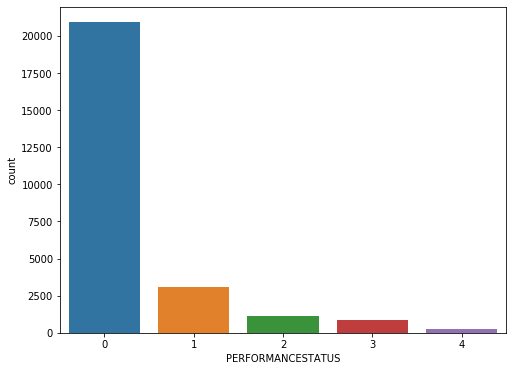

In [95]:
ax = sns.countplot(data = df, x = 'PERFORMANCESTATUS', order = ['0', '1', '2', '3', '4'])
plt.gcf().set_size_inches(8,6)

In [96]:
df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].astype(str)
df['ECOG0'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('0' in tumour for tumour in patient) else False)
df['ECOG1'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('1' in tumour for tumour in patient) else False)
df['ECOG2'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['ECOG3'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df['ECOG4'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: True if any('4' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,nan,nan,nan,Curative,nan,NaN,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,nan,nan,nan,nan,nan,NaN,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,nan,nan,nan,Non curative,nan,NaN,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,nan,nan,nan,nan,nan,NaN,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,nan,nan,nan,Curative,1,NaN,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False


In [97]:
# df = df.drop(['PERFORMANCESTATUS'], axis = 1)
# df.head()

In [98]:
df['ACE27'].value_counts()

9     6157
0     2858
1      861
3      460
2      398
3m       4
1m       3
2m       3
Name: ACE27, dtype: int64

In [99]:
df['ACE27'] = df['ACE27'].astype(str)
def ace27(value):
    if value.startswith('0'):
        return '0'
    elif value.startswith('1'):
        return '1'
    elif value.startswith('2'):
        return '2'
    elif value.startswith('3'):
        return '3'
    elif value == '9' or value == 'nan':
        return np.nan
    else:
        return value

df['ACE27'] = df['ACE27'].apply(ace27)
df['ACE27'].value_counts()

0    2858
1     864
3     464
2     401
Name: ACE27, dtype: int64

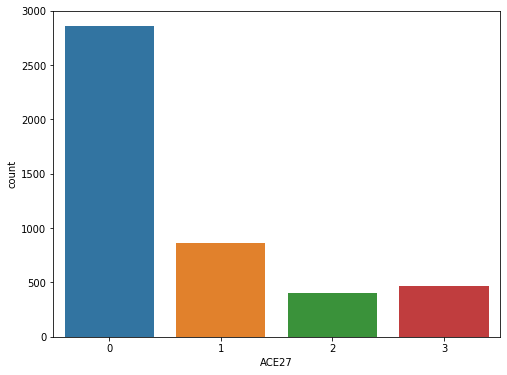

In [100]:
ax = sns.countplot(data = df, x = 'ACE27', order = ['0', '1', '2', '3'])
plt.gcf().set_size_inches(8,6)

In [101]:
df['ACE27'] = df['ACE27'].astype(str)
df['ACE0'] = df.groupby('PATIENTID')['ACE27'].transform(lambda patient: True if any('0' in tumour for tumour in patient) else False)
df['ACE1'] = df.groupby('PATIENTID')['ACE27'].transform(lambda patient: True if any('1' in tumour for tumour in patient) else False)
df['ACE2'] = df.groupby('PATIENTID')['ACE27'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['ACE3'] = df.groupby('PATIENTID')['ACE27'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,nan,nan,nan,Curative,nan,nan,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,nan,nan,nan,nan,nan,nan,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,nan,nan,nan,Non curative,nan,nan,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,nan,nan,nan,nan,nan,nan,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,nan,nan,nan,Curative,1,nan,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False


In [102]:
# df = df.drop(['ACE27'], axis = 1)
# df.head()

In [103]:
pd.set_option('display.max_rows', 20) 

In [104]:
df['DATE_FIRST_SURGERY'].sort_values().dropna()

329245    1995-04-14
366512    2013-01-01
368043    2013-01-01
303307    2013-01-02
326098    2013-01-02
             ...    
351169    2017-01-02
300153    2017-01-12
321106    2017-01-30
360280    2017-02-05
354881    2017-04-21
Name: DATE_FIRST_SURGERY, Length: 90857, dtype: object

In [105]:
pd.set_option('display.max_rows', None) 

In [106]:
df['LATERALITY'].value_counts()

L    54999
R    51692
9     1366
8      137
M       21
B       14
Name: LATERALITY, dtype: int64

In [107]:
df['LATERALITY'] = df['LATERALITY'].astype(str)
def laterality(value):
    if value.startswith('8') or value.startswith('9') or value == 'nan':
        return np.nan
    else:
        return value

df['LATERALITY'] = df['LATERALITY'].apply(laterality)
df['LATERALITY'].value_counts()

L    54999
R    51692
M       21
B       14
Name: LATERALITY, dtype: int64

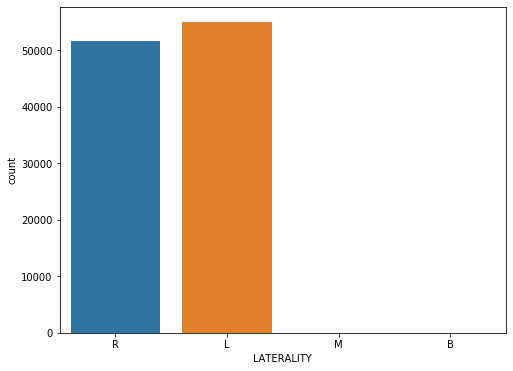

In [108]:
ax = sns.countplot(data = df, x = 'LATERALITY')
plt.gcf().set_size_inches(8,6)

In [109]:
df['LATERALITY'] = df['LATERALITY'].astype(str)
df['LEFT'] = df.groupby('PATIENTID')['LATERALITY'].transform(lambda patient: True if any('L' in tumour for tumour in patient) else False)
df['RIGHT'] = df.groupby('PATIENTID')['LATERALITY'].transform(lambda patient: True if any('R' in tumour for tumour in patient) else False)
df['MIDLINE'] = df.groupby('PATIENTID')['LATERALITY'].transform(lambda patient: True if any('M' in tumour for tumour in patient) else False)
df['BILATERAL'] = df.groupby('PATIENTID')['LATERALITY'].transform(lambda patient: True if any('B' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,nan,nan,nan,Curative,nan,nan,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,nan,nan,nan,nan,nan,nan,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,nan,nan,nan,Non curative,nan,nan,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,nan,nan,nan,nan,nan,nan,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,nan,nan,nan,Curative,1,nan,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False


In [110]:
# df = df.drop(['LATERALITY'], axis = 1)
# df.head()

In [111]:
df['QUINTILE_2015'].value_counts()

1 - least deprived    25460
2                     24780
3                     22279
4                     19442
5 - most deprived     16269
Name: QUINTILE_2015, dtype: int64

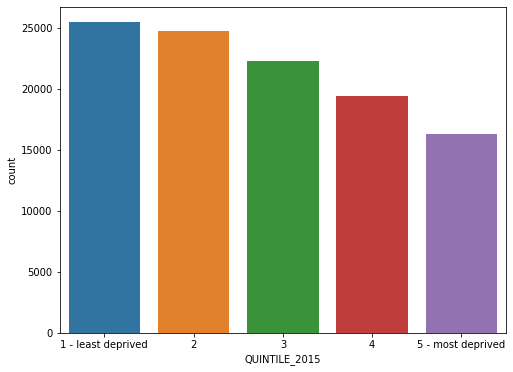

In [112]:
ax = sns.countplot(data = df, x = 'QUINTILE_2015', order = ['1 - least deprived', '2', '3', '4', '5 - most deprived'])
plt.gcf().set_size_inches(8,6)

In [113]:
df['QUINTILE_2015'] = df['QUINTILE_2015'].astype(str)
df['DEPR1'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('1 - least deprived' in tumour for tumour in patient) else False)
df['DEPR2'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('2' in tumour for tumour in patient) else False)
df['DEPR3'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('3' in tumour for tumour in patient) else False)
df['DEPR4'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('4' in tumour for tumour in patient) else False)
df['DEPR5'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: True if any('5 - most deprived' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,ER_NEG,PR_POS,PR_NEG,HER_POS,HER_NEG,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5
624,10000724,M,810000724,White British,A,2017-01-16,10335800,2013-09-08,nan,C50,Malignant,Stage 2,G2,71,L1201,nan,nan,nan,Curative,nan,nan,NaN,R,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
650,10000752,F,810000752,White British,A,2017-01-16,10335805,2015-11-11,C504,C50,Malignant,nan,G2,68,L0801,nan,nan,nan,nan,nan,nan,2016-09-18,L,1 - least deprived,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
913,10001050,F,810001050,White British,A,2017-01-16,10335823,2015-10-24,nan,C50,Malignant,Stage 4,G3,86,L0401,nan,nan,nan,Non curative,nan,nan,2015-12-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1543,10001750,M,810001750,White British,A,2017-01-16,10335873,2014-09-23,nan,C50,Malignant,nan,G1,71,L0801,nan,nan,nan,nan,nan,nan,2014-09-23,L,1 - least deprived,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
1613,10001824,F,810001824,Other ethnic group,A,2017-01-17,10335879,2015-03-15,nan,C50,Malignant,Stage 3,G2,87,L0801,nan,nan,nan,Curative,1,nan,2015-03-15,L,4,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [114]:
# df = df.drop(['QUINTILE_2015'], axis = 1)
# df.head()

In [115]:
df.shape

(108230, 83)

In [116]:
df.to_csv('./Data/avpat_avtum.csv', sep='^')